# Printify Product Pricing Data Analysis

# Load and preview data

In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'results/pricing_results.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows and last 5 rows to preview the data
pd.concat([df.head(5), df.tail(5)])


,blueprint_id,source_product_title,product_type,print_provider_id,print_provider_name,print_provider_country,product_cost,standard_shipping_first_item,standard_shipping_additional_items,handling_time_days,shipping_to_country,variant_id,variant_title,custom_title,created_product_id
0,67,Kids Hoodie,hoodie,6,T Shirt and Sons,GB,24.52,22.79,6.19,10-30 days,REST_OF_THE_WORLD,32103,Arctic White / XS,TEMP: Kids Hoodie (6 - T Shirt and Sons),6842a89e100fcd23250c4a40
1,67,Kids Hoodie,hoodie,6,T Shirt and Sons,GB,24.52,22.79,6.19,10-30 days,REST_OF_THE_WORLD,32104,Arctic White / S,TEMP: Kids Hoodie (6 - T Shirt and Sons),6842a89e100fcd23250c4a40
2,67,Kids Hoodie,hoodie,6,T Shirt and Sons,GB,24.52,22.79,6.19,10-30 days,REST_OF_THE_WORLD,32105,Arctic White / M,TEMP: Kids Hoodie (6 - T Shirt and Sons),6842a89e100fcd23250c4a40
3,67,Kids Hoodie,hoodie,6,T Shirt and Sons,GB,24.52,22.79,6.19,10-30 days,REST_OF_THE_WORLD,32106,Arctic White / L,TEMP: Kids Hoodie (6 - T Shirt and Sons),6842a89e100fcd23250c4a40
4,67,Kids Hoodie,hoodie,6,T Shirt and Sons,GB,24.52,22.79,6.19,10-30 days,REST_OF_THE_WORLD,32107,Arctic White / XL,TEMP: Kids Hoodie (6 - T Shirt and Sons),6842a89e100fcd23250c4a40
15937,1925,Unisex Fleece Zip Up Hoodie,hoodie,99,Printify Choice,US,43.17,8.49,2.09,2-5 days,US,119870,Charcoal Heather / 2XL,TEMP: Unisex Fleece Zip Up Hoodie (99 - Printi...,6842b01d8673f14ba7078243
15938,1925,Unisex Fleece Zip Up Hoodie,hoodie,99,Printify Choice,US,40.94,8.49,2.09,2-5 days,US,119871,Charcoal Heather / L,TEMP: Unisex Fleece Zip Up Hoodie (99 - Printi...,6842b01d8673f14ba7078243
15939,1925,Unisex Fleece Zip Up Hoodie,hoodie,99,Printify Choice,US,40.94,8.49,2.09,2-5 days,US,119872,Charcoal Heather / M,TEMP: Unisex Fleece Zip Up Hoodie (99 - Printi...,6842b01d8673f14ba7078243
15940,1925,Unisex Fleece Zip Up Hoodie,hoodie,99,Printify Choice,US,40.94,8.49,2.09,2-5 days,US,119873,Charcoal Heather / S,TEMP: Unisex Fleece Zip Up Hoodie (99 - Printi...,6842b01d8673f14ba7078243
15941,1925,Unisex Fleece Zip Up Hoodie,hoodie,99,Printify Choice,US,40.94,8.49,2.09,2-5 days,US,119874,Charcoal Heather / XL,TEMP: Unisex Fleece Zip Up Hoodie (99 - Printi...,6842b01d8673f14ba7078243


# Reduce data by grouping variants with the same providers and pricing information

In [ ]:
# Define the columns to group by (everything except variant_id and variant_title)
group_columns = [col for col in df.columns if col not in ['variant_id', 'variant_title']]

# Group by those columns and aggregate the variants
grouped_df = df.groupby(group_columns, as_index=False).agg({
    'variant_id': list,
    'variant_title': list
})

# Combine variant_id and variant_title into a single string
grouped_df['variants'] = [
    ', '.join(f"{vid}: {vtitle}" for vid, vtitle in zip(vids, vtitles))
    for vids, vtitles in zip(grouped_df['variant_id'], grouped_df['variant_title'])
]

# Drop the now redundant columns
grouped_df = grouped_df.drop(columns=['variant_id', 'variant_title'])

# Sort the DataFrame
grouped_df = grouped_df.sort_values(by=['product_type', 'print_provider_name', 'product_cost'])

# Preview the result
print(len(grouped_df))
pd.concat([grouped_df.head(5), grouped_df.tail(5)])



727


,blueprint_id,source_product_title,product_type,print_provider_id,print_provider_name,print_provider_country,product_cost,standard_shipping_first_item,standard_shipping_additional_items,handling_time_days,shipping_to_country,custom_title,created_product_id,variants
295,598,Bumper Stickers,bumper sticker,73,Printed Simply,US,4.22,5.09,0.07,2-5 days,US,TEMP: Bumper Stickers (73 - Printed Simply),6842aba28673f14ba70780ea,"71929: 7.5"" × 3.75"" / Rectangle / White"
296,598,Bumper Stickers,bumper sticker,73,Printed Simply,US,4.58,5.09,0.07,2-5 days,US,TEMP: Bumper Stickers (73 - Printed Simply),6842aba28673f14ba70780ea,"71930: 11"" × 3"" / Rectangle / White"
297,598,Bumper Stickers,bumper sticker,73,Printed Simply,US,5.63,5.09,0.07,2-5 days,US,TEMP: Bumper Stickers (73 - Printed Simply),6842aba28673f14ba70780ea,"71931: 15"" × 3.75"" / Rectangle / White"
418,859,Women’s Full-Zip Hoodie (AOP),hoodie,14,ArtsAdd,CN,41.56,3.60,3.60,5-15 days,US,TEMP: Women’s Full-Zip Hoodie (AOP) (14 - Arts...,6842acafc0fddeecc9019b4d,"76814: S / Black, 76815: S / White, 76816: M /..."
689,1673,Youth Heavy Blend Zipped Hoodie,hoodie,61,Dimona Tee,US,26.58,4.75,2.40,2-5 days,US,TEMP: Youth Heavy Blend Zipped Hoodie (61 - Di...,6842af912a2b2e25a5090b36,"115231: XS / Navy, 115232: S / Navy, 115233: M..."
508,1313,Cotton Canvas Tote Bag,tote bag,99,Printify Choice,US,9.22,4.75,2.40,2-5 days,US,TEMP: Cotton Canvas Tote Bag (99 - Printify Ch...,6842adecc0fddeecc9019b95,"101409: Natural / 15"" x 16"", 103598: Black / 1..."
724,1920,Eco Tote Bag,tote bag,99,Printify Choice,US,18.36,4.75,2.40,2-5 days,US,TEMP: Eco Tote Bag (99 - Printify Choice),6842b0186bf7e3b5da0b87ed,"119445: Black / One size, 119446: Oyster / One..."
702,1717,Thermochromic Tote Bag (AOP),tote bag,335,Sun-Fly Sublimation,CN,7.94,7.19,7.19,7-15 days,US,TEMP: Thermochromic Tote Bag (AOP) (335 - Sun-...,6842afd4ad111d603b0518e6,"117644: 13"" × 14'' / Purple"
399,731,Organic Cotton Tote Bag,tote bag,26,Textildruck Europa,DE,11.81,12.49,6.59,5-15 days,US,TEMP: Organic Cotton Tote Bag (26 - Textildruc...,6842ac707a2844ab2c06d4f1,"79434: Black / 15"" x 16.5"", 79435: Classic Red..."
287,553,Cotton Tote Bag,tote bag,34,The Print Bar,AU,18.33,14.49,1.59,10-30 days,REST_OF_THE_WORLD,TEMP: Cotton Tote Bag (34 - The Print Bar),6842ab7fbf9d7f6bf0028ef4,"70603: One size / Black, 70646: One size / Cream"


# Filter out long shipping/kids products and enrich data with total cost for customer

In [85]:
filtered_grouped_df = grouped_df.copy()

# Extract the first number from the handling_time_days string
filtered_grouped_df['handling_time_min'] = filtered_grouped_df['handling_time_days'].str.extract(r'(\d+)').astype(int)
# Filter out rows where the minimum handling time is >= 10
filtered_grouped_df = filtered_grouped_df[filtered_grouped_df['handling_time_min'] < 10]
# Drop the helper column
filtered_grouped_df = filtered_grouped_df.drop(columns=['handling_time_min'])

# Enrich data with total customer cost
filtered_grouped_df['total_customer_cost'] = filtered_grouped_df['product_cost'] + filtered_grouped_df['standard_shipping_first_item']

# Remove kids, pets, and toddler products
exclude_keywords = ['kid', "kid's", 'kids', 'pet', 'pets', "pet's", 'toddler', 'toddlers', "toddler's", 'baby', 'babies', "baby's", 'child', 'children', "child's", 'infant', 'infants', "infant's"]
pattern = '|'.join(exclude_keywords)
filtered_grouped_df = filtered_grouped_df[
    ~filtered_grouped_df['source_product_title'].str.lower().str.contains(pattern)
]

# Only keep the cheapest variant per product_type and provider
filtered_grouped_df = filtered_grouped_df.sort_values('total_customer_cost').groupby(
    ['product_type', 'print_provider_id'], as_index=False
).first()

print(len(filtered_grouped_df))
filtered_grouped_df.head(5)


77


,product_type,print_provider_id,blueprint_id,source_product_title,print_provider_name,print_provider_country,product_cost,standard_shipping_first_item,standard_shipping_additional_items,handling_time_days,shipping_to_country,custom_title,created_product_id,variants,total_customer_cost
0,bumper sticker,73,598,Bumper Stickers,Printed Simply,US,4.22,5.09,0.07,2-5 days,US,TEMP: Bumper Stickers (73 - Printed Simply),6842aba28673f14ba70780ea,"71929: 7.5"" × 3.75"" / Rectangle / White",9.31
1,hoodie,3,439,Three-Panel Fleece Hoodie,Marco Fine Arts,US,24.72,8.49,2.09,2-5 days,US,TEMP: Three-Panel Fleece Hoodie (3 - Marco Fin...,6842aa68ad111d603b05175e,"62259: Black / S, 62260: Black / M, 62261: Bla...",33.21
2,hoodie,10,450,Unisex Pullover Hoodie (AOP),MWW On Demand,US,52.30,8.99,2.49,2-5 days,US,TEMP: Unisex Pullover Hoodie (AOP) (10 - MWW O...,6842aab37a2844ab2c06d47a,63240: XS,61.29
3,hoodie,14,859,Women’s Full-Zip Hoodie (AOP),ArtsAdd,CN,41.56,3.60,3.60,5-15 days,US,TEMP: Women’s Full-Zip Hoodie (AOP) (14 - Arts...,6842acafc0fddeecc9019b4d,"76814: S / Black, 76815: S / White, 76816: M /...",45.16
4,hoodie,26,92,Unisex College Hoodie,Textildruck Europa,DE,20.82,17.49,13.99,5-15 days,US,TEMP: Unisex College Hoodie (26 - Textildruck ...,6842a8d3c0fddeecc90199fe,"34057: Arctic White / XS, 34071: Arctic White ...",38.31


# Plot the best providers by product type

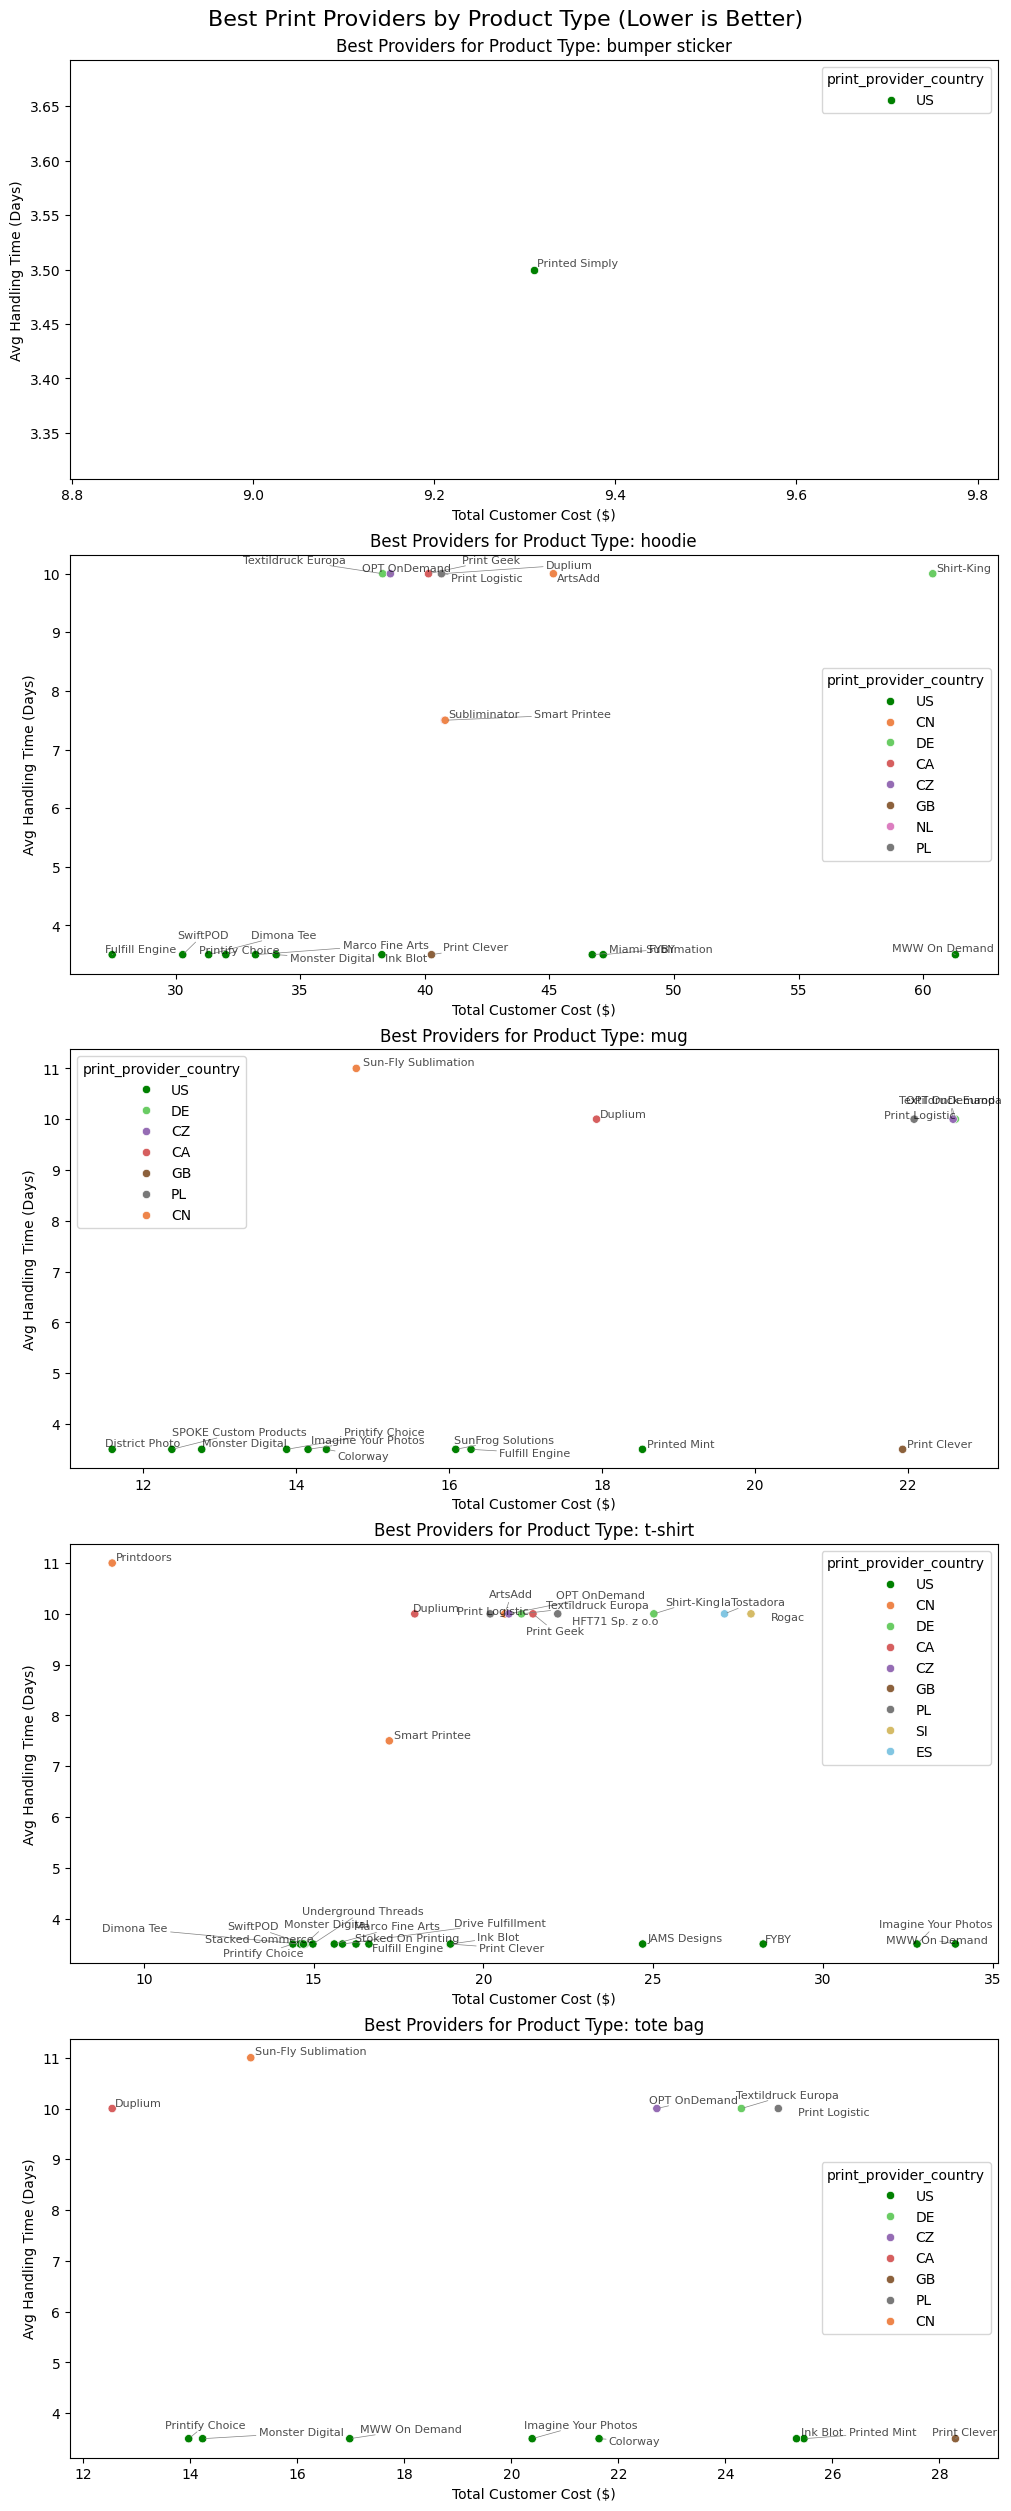

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Copy and preprocess
df_to_graph = filtered_grouped_df.copy()
df_to_graph['handling_time_avg'] = df_to_graph['handling_time_days'].str.extractall(r'(\d+)').astype(int).groupby(level=0).mean().astype(float)

# Build color palette: green for US, others auto-assigned from a colormap
unique_countries = df_to_graph['print_provider_country'].unique()
palette = {
    country: 'green' if country == 'US' else sns.color_palette("muted")[i % 10]
    for i, country in enumerate(unique_countries)
}

# Plot setup
product_types = df_to_graph['product_type'].unique()
n = len(product_types)
fig, axes = plt.subplots(n, 1, figsize=(10, 5 * n), constrained_layout=True)
if n == 1:
    axes = [axes]

# Scatter plot per product type
for i, product in enumerate(product_types):
    ax = axes[i]
    subset = df_to_graph[df_to_graph['product_type'] == product]

    sns.scatterplot(
        data=subset,
        x='total_customer_cost',
        y='handling_time_avg',
        hue='print_provider_country',
        palette=palette,
        ax=ax
    )

    texts = []
    for _, row in subset.iterrows():
        texts.append(
            ax.text(
                row['total_customer_cost'],
                row['handling_time_avg'],
                row['print_provider_name'],
                fontsize=8,
                alpha=0.7
            )
        )

    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    ax.set_title(f"Best Providers for Product Type: {product}")
    ax.set_xlabel("Total Customer Cost ($)")
    ax.set_ylabel("Avg Handling Time (Days)")

plt.suptitle("Best Print Providers by Product Type (Lower is Better)", fontsize=16)
plt.savefig("results/best_providers_plot.png", dpi=300, bbox_inches='tight')

plt.show()


# Export CSV with best products based on shipping time and price

In [87]:
from sklearn.preprocessing import MinMaxScaler

df_for_csv = filtered_grouped_df.copy()
df_for_csv['handling_time_avg'] = df_for_csv['handling_time_days'].str.extractall(r'(\d+)').astype(int).groupby(level=0).mean().astype(float)

final_rows = []

# Process per product_type
for product, group in df_for_csv.groupby('product_type'):
    temp = group.copy()

    # Normalize
    scaler = MinMaxScaler()
    temp[['cost_norm', 'time_norm']] = scaler.fit_transform(
        temp[['total_customer_cost', 'handling_time_avg']]
    )

    # Score
    temp['score'] = temp['cost_norm'] + temp['time_norm']

    # Best row per provider
    best_per_provider = temp.sort_values('score').groupby('print_provider_id', as_index=False).first()

    # Top 5 provider IDs
    top5_ids = best_per_provider.sort_values('score').head(5)['print_provider_id'].tolist()

    # All rows from original group
    top_rows = group[group['print_provider_id'].isin(top5_ids)]

    # Merge back the score column using `print_provider_id` and `product_type` as keys
    top_rows_with_scores = top_rows.merge(
        temp[['print_provider_id', 'score']],
        on='print_provider_id',
        how='left'
    )

    final_rows.append(top_rows_with_scores)

# Combine all
best_providers_df = pd.concat(final_rows, ignore_index=True)

# Invert and scale scores to 0–10 range (10 = best)
min_score = best_providers_df['score'].min()
max_score = best_providers_df['score'].max()

best_providers_df['score_normalized'] = (
    10 * (1 - (best_providers_df['score'] - min_score) / (max_score - min_score))
).round(2)

# Preview the final DataFrame
best_providers_df.sort_values(['product_type', 'score_normalized'], ascending=[True, False])


,product_type,print_provider_id,blueprint_id,source_product_title,print_provider_name,print_provider_country,product_cost,standard_shipping_first_item,standard_shipping_additional_items,handling_time_days,shipping_to_country,custom_title,created_product_id,variants,total_customer_cost,handling_time_avg,score,score_normalized
0,bumper sticker,73,598,Bumper Stickers,Printed Simply,US,4.22,5.09,0.07,2-5 days,US,TEMP: Bumper Stickers (73 - Printed Simply),6842aba28673f14ba70780ea,"71929: 7.5"" × 3.75"" / Rectangle / White",9.31,3.5,0.000000,10.00
5,hoodie,217,1673,Youth Heavy Blend Zipped Hoodie,Fulfill Engine,US,22.27,5.19,2.19,2-5 days,US,TEMP: Youth Heavy Blend Zipped Hoodie (217 - F...,6842af927a2844ab2c06d5a5,"115231: XS / Navy, 115232: S / Navy, 115233: M...",27.46,3.5,0.000000,10.00
2,hoodie,39,536,Unisex EcoSmart® Pullover Hoodie Sweatshirt,SwiftPOD,US,21.80,8.49,2.09,2-5 days,US,TEMP: Unisex EcoSmart® Pullover Hoodie Sweatsh...,6842ab78100fcd23250c4afc,"69032: Black / S, 69033: Charcoal Heather / S,...",30.29,3.5,0.083654,8.55
3,hoodie,61,1673,Youth Heavy Blend Zipped Hoodie,Dimona Tee,US,26.58,4.75,2.40,2-5 days,US,TEMP: Youth Heavy Blend Zipped Hoodie (61 - Di...,6842af912a2b2e25a5090b36,"115231: XS / Navy, 115232: S / Navy, 115233: M...",31.33,3.5,0.114396,8.02
4,hoodie,99,1525,Unisex Midweight Softstyle Fleece Hoodie,Printify Choice,US,23.53,8.49,2.09,2-5 days,US,TEMP: Unisex Midweight Softstyle Fleece Hoodie...,6842af1c6bf7e3b5da0b87bd,"109434: XL / Red, 109438: XL / Sky, 109401: L ...",32.02,3.5,0.134792,7.67
1,hoodie,3,439,Three-Panel Fleece Hoodie,Marco Fine Arts,US,24.72,8.49,2.09,2-5 days,US,TEMP: Three-Panel Fleece Hoodie (3 - Marco Fin...,6842aa68ad111d603b05175e,"62259: Black / S, 62260: Black / M, 62261: Bla...",33.21,3.5,0.169967,7.06
7,mug,28,478,"Ceramic Mug, (11oz, 15oz)",District Photo,US,4.61,6.99,3.09,2-5 days,US,"TEMP: Ceramic Mug, (11oz, 15oz) (28 - District...",6842aaffbf9d7f6bf0028eb7,65216: 11oz,11.60,3.5,0.000000,10.00
6,mug,1,68,Mug 11oz,SPOKE Custom Products,US,5.39,6.99,3.09,2-5 days,US,TEMP: Mug 11oz (1 - SPOKE Custom Products),6842a8b48673f14ba707800a,33719: 11oz,12.38,3.5,0.070780,8.77
8,mug,29,478,"Ceramic Mug, (11oz, 15oz)",Monster Digital,US,5.78,6.99,3.09,2-5 days,US,"TEMP: Ceramic Mug, (11oz, 15oz) (29 - Monster ...",6842ab006bf7e3b5da0b8694,65216: 11oz,12.77,3.5,0.106171,8.16
10,mug,99,479,"Black Mug (11oz, 15oz)",Printify Choice,US,6.89,6.99,3.09,2-5 days,US,"TEMP: Black Mug (11oz, 15oz) (99 - Printify Ch...",6842ab0cbf9d7f6bf0028ec0,65217: 11oz,13.88,3.5,0.206897,6.42


In [ ]:
# Columns to drop before exporting
cols_to_drop = ['custom_title', 'created_product_id', 'handling_time_avg', 'score']

# Create export DataFrame without those columns
export_df = best_providers_df.drop(columns=cols_to_drop)

# Export to CSV
export_df.to_csv('results/final_filtered_products.csv', index=False)
